# Meta-Sampling: Estratégia de seleção de instâncias baseada em meta-aprendizado

## Imports

In [1]:
import os
import warnings 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

## Elaboração de meta-base 

In [2]:
DATA_DIR = '../../scripts/metabase/'

In [3]:

dfs = []
for root, _, files in os.walk(DATA_DIR):
    
    if not len(files):
        continue
        
    df = pd.concat(pd.read_csv(os.path.join(root,file)) for file in files).set_index(['dataset_id','estimator', 'query_number'])
    dfs.append(df)

In [4]:
metabase = pd.concat(dfs)
metabase

attr_conc.mean  attr_conc.sd  \
dataset_id estimator            query_number                                 
43942.0    MLPClassifier        0.0                 0.070732      0.148803   
                                1.0                 0.137011      0.212440   
                                2.0                 0.095513      0.184654   
                                3.0                 0.180195      0.231399   
                                4.0                 0.145646      0.214456   
...                                                      ...           ...   
740.0      KNeighborsClassifier 95.0                0.036479      0.052695   
                                96.0                0.036542      0.053085   
                                97.0                0.037300      0.054141   
                                98.0                0.038074      0.054225   
                                99.0                0.037691      0.053868   

                                              attr_ent.mean   attr_ent.sd  \
dataset_id estimator            query_number                                
43942.0    MLPClassifier        0.0                0.371380  4.930491e-01   
                                1.0                0.371955  4.954930e-01   
                                2.0                0.371699  4.941360e-01   
                                3.0                0.371866  4.956424e-01   
                                4.0                0.371813  4.957680e-01   
...                                                     ...           ...   
740.0      KNeighborsClassifier 95.0               2.584963  4.681111e-16   
                                96.0               2.584825  5.977255e-05   
                                97.0               2.584877  4.681111e-16   
                                98.0               2.584863  4.681111e-16   
                                99.0               2.584870  0.000000e+00   

                                              attr_to_inst  cat_to_num  \
dataset_id estimator            query_number                             
43942.0    MLPClassifier        0.0               0.130240         0.0   
                                1.0               0.131222         0.0   
                                2.0               0.132219         0.0   
                                3.0               0.133231         0.0   
                                4.0               0.134259         0.0   
...                                                    ...         ...   
740.0      KNeighborsClassifier 95.0              0.037037         0.0   
                                96.0              0.037736         0.0   
                                97.0              0.038462         0.0   
                                98.0              0.039216         0.0   
                                99.0              0.040000         0.0   

                                              cohesiveness.mean  \
dataset_id estimator            query_number                      
43942.0    MLPClassifier        0.0                   53.663361   
                                1.0                   53.389046   
                                2.0                   52.925247   
                                3.0                   52.572741   
                                4.0                   52.223331   
...                                                         ...   
740.0      KNeighborsClassifier 95.0                  90.864815   
                                96.0                  89.426415   
                                97.0                  87.536538   
                                98.0                  86.207843   
                                99.0                  84.534000   

                                              cohesiveness.sd  cor.mean  \
dataset_id estimator            query_number                              
43942.0    MLPClassifier        0.0         

Transformando `query_number` em inteiro:

In [5]:
metabase.reset_index(level=2, inplace=True)
metabase.query_number = metabase.query_number.astype(int)
metabase.set_index('query_number', append=True, inplace=True)
metabase

attr_conc.mean  attr_conc.sd  \
dataset_id estimator            query_number                                 
43942.0    MLPClassifier        0                   0.070732      0.148803   
                                1                   0.137011      0.212440   
                                2                   0.095513      0.184654   
                                3                   0.180195      0.231399   
                                4                   0.145646      0.214456   
...                                                      ...           ...   
740.0      KNeighborsClassifier 95                  0.036479      0.052695   
                                96                  0.036542      0.053085   
                                97                  0.037300      0.054141   
                                98                  0.038074      0.054225   
                                99                  0.037691      0.053868   

                                              attr_ent.mean   attr_ent.sd  \
dataset_id estimator            query_number                                
43942.0    MLPClassifier        0                  0.371380  4.930491e-01   
                                1                  0.371955  4.954930e-01   
                                2                  0.371699  4.941360e-01   
                                3                  0.371866  4.956424e-01   
                                4                  0.371813  4.957680e-01   
...                                                     ...           ...   
740.0      KNeighborsClassifier 95                 2.584963  4.681111e-16   
                                96                 2.584825  5.977255e-05   
                                97                 2.584877  4.681111e-16   
                                98                 2.584863  4.681111e-16   
                                99                 2.584870  0.000000e+00   

                                              attr_to_inst  cat_to_num  \
dataset_id estimator            query_number                             
43942.0    MLPClassifier        0                 0.130240         0.0   
                                1                 0.131222         0.0   
                                2                 0.132219         0.0   
                                3                 0.133231         0.0   
                                4                 0.134259         0.0   
...                                                    ...         ...   
740.0      KNeighborsClassifier 95                0.037037         0.0   
                                96                0.037736         0.0   
                                97                0.038462         0.0   
                                98                0.039216         0.0   
                                99                0.040000         0.0   

                                              cohesiveness.mean  \
dataset_id estimator            query_number                      
43942.0    MLPClassifier        0                     53.663361   
                                1                     53.389046   
                                2                     52.925247   
                                3                     52.572741   
                                4                     52.223331   
...                                                         ...   
740.0      KNeighborsClassifier 95                    90.864815   
                                96                    89.426415   
                                97                    87.536538   
                                98                    86.207843   
                                99                    84.534000   

                                              cohesiveness.sd  cor.mean  \
dataset_id estimator            query_number                              
43942.0    MLPClassifier        0           

Fazendo download do arquivo:

## Treinamento de Meta-Modelo

Substituindo valores infinitos por `np.nan`

In [6]:
metabase.replace([np.inf, -np.inf], np.nan, inplace=True)

Separando uma base para teste e o restante para treinamento (LOO)

In [7]:
train_index = metabase.index.levels[0][:-1]
test_index = metabase.index.levels[0][-1:]

len(train_index), len(test_index)

(80, 1)

Separando features e rótulos (utilizando apenas o classificador SVM)

In [8]:
train_data = metabase.loc[train_index].xs("SVC", level='estimator').reset_index()
test_data = metabase.loc[test_index].xs("SVC", level='estimator').reset_index()

In [9]:
test_data

,dataset_id,query_number,attr_conc.mean,attr_conc.sd,attr_ent.mean,attr_ent.sd,attr_to_inst,cat_to_num,cohesiveness.mean,cohesiveness.sd,...,ch,int,nre,pb,sc,sil,vdb,vdu,best_strategy,best_score
0,45553.0,0,0.017551,0.042146,1.944048,1.581093,0.005001,0.0,1670.836898,380.282255,...,5633.758302,209.010411,0.640467,-0.526761,0.0,0.363285,1.033545,1.713965e-09,consensus_entropy_sampling,0.557942
1,45553.0,1,0.008244,0.022715,1.944124,1.581246,0.005005,0.0,1669.714646,380.034313,...,5630.433727,209.122543,0.639987,-0.527177,0.0,0.363502,1.033056,1.718058e-09,max_disagreement_sampling,0.554700
2,45553.0,2,0.014066,0.033147,1.944013,1.581118,0.005008,0.0,1668.751607,379.980446,...,5622.783871,209.041925,0.640050,-0.526790,0.0,0.363297,1.033482,1.720152e-09,entropy_sampling,0.521070
3,45553.0,3,0.010432,0.034584,1.943996,1.581064,0.005012,0.0,1667.316386,379.270553,...,5616.459824,209.063313,0.639841,-0.526811,0.0,0.363315,1.033437,1.723260e-09,entropy_sampling,0.616288
4,45553.0,4,0.021625,0.051486,1.944069,1.581083,0.005015,0.0,1666.070226,378.771593,...,5614.696988,209.538089,0.637045,-0.529262,0.0,0.364714,1.030140,1.736037e-09,margin_sampling,0.555105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,45553.0,95,0.011713,0.032014,1.941408,1.581266,0.005345,0.0,1526.081287,332.673039,...,5299.188543,204.725989,0.645453,-0.531339,0.0,0.358494,1.042691,3.629437e-09,margin_sampling,0.728525
96,45553.0,96,0.011930,0.035973,1.941449,1.581275,0.005348,0.0,1525.005132,332.470166,...,5296.318775,205.151801,0.642829,-0.533434,0.0,0.359682,1.039564,3.361127e-09,entropy_sampling,0.730146
97,45553.0,97,0.031503,0.107145,1.941584,1.581374,0.005352,0.0,1523.737379,332.285887,...,5288.999277,205.072514,0.642708,-0.533504,0.0,0.359532,1.039873,3.366867e-09,uncertainty_batch_sampling,0.729741
98,45553.0,98,0.010169,0.027619,1.941585,1.581357,0.005356,0.0,1522.748697,332.388256,...,5281.415234,204.454172,0.645654,-0.531128,0.0,0.358105,1.043641,3.643647e-09,uncertainty_sampling,0.728930


Separando conjuntos em treino e teste

In [10]:
columns_to_drop = ['dataset_id', 'best_strategy', 'best_score']

X_train = train_data.drop(columns=columns_to_drop)
y_train = train_data['best_strategy']

X_test = test_data.drop(columns=columns_to_drop)
y_test = test_data['best_strategy']

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5076, 72) (5076,)
(100, 72) (100,)


Induzindo modelo

In [11]:
import numpy as np 
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline


meta_model = Pipeline([
    ('mean_inputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('meta-model', RandomForestClassifier())
])

meta_model.fit(X_train.values, y_train)

/home/gabriel/UnB/PIBIC/meta-active-learning/venv/lib/python3.8/site-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: [42]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Pipeline(steps=[('mean_inputer', SimpleImputer()),
                ('meta-model', RandomForestClassifier())])

In [12]:
import pickle as pkl

with open('meta_model.pkl', 'wb') as f:
    pkl.dump(meta_model, f)

## Implementando Meta-sampling

Sampling strategy utilizada:

```python
class ActiveLearningExperiment:
    ...
    def __meta_sample_query(self, estimator,
                            l_pool, u_pool,
                            query_strategies,
                            meta_model):

        query_strategy_dict = {
            'consensus_entropy_sampling': d.consensus_entropy_sampling,
            'entropy_sampling': u.entropy_sampling,
            'margin_sampling': u.margin_sampling,
            'max_disagreement_sampling': d.max_disagreement_sampling,
            'uncertainty_batch_sampling': b.uncertainty_batch_sampling,
            'uncertainty_sampling': u.uncertainty_sampling,
            'vote_entropy_sampling': d.vote_entropy_sampling
        }

        l_X_pool, l_y_pool = l_pool
        u_X_pool, u_y_pool = u_pool
        u_pool_size = np.size(u_y_pool)

        # Extração de metafeatures
        uns_mfs = self._extract_unsupervised_mfs(u_X_pool)
        clst_mfs = self._extract_clustering_mfs(u_X_pool)
        mfs = pd.concat([uns_mfs, clst_mfs]).values

        X = [mfs]

        pred_strategy = meta_model.predict(X)[0]
        query_strategy = query_strategy_dict[pred_strategy]

        learner = self.__gen_learner(query_strategy=query_strategy,
                                     estimator=estimator,
                                     X_training=l_X_pool,
                                     y_training=l_y_pool)

        query_index = (learner.query(u_X_pool)[0]
                       if u_pool_size > self.batch_size + 2
                       else np.arange(u_pool_size))

        learner.teach(X=u_X_pool[query_index], y=u_y_pool[query_index])

        y_pred = learner.predict(self.X_test)
        score = f1_score(self.y_test, y_pred, average='macro')

        return query_index, score, query_strategy.__name__


```

## Comparando Estratégias

Estratégias padrão que serão comparadas:

In [13]:
from modAL import uncertainty as u, disagreement as d, batch as b

query_strategies = {
   'Uncertainty Sampling': u.uncertainty_sampling,
   'Entropy Sampling': u.entropy_sampling,
   'Margin Sampling': u.margin_sampling,
   'Uncertainty Batch Sampling': b.uncertainty_batch_sampling,
   'Consensus Entropy Sampling': d.consensus_entropy_sampling,
   'Vote Entropy Sampling': d.vote_entropy_sampling,
   'Max Disagreement Sampling': d.max_disagreement_sampling
}

Definindo parâmetros

In [14]:
BATCH_SIZE = 5
N_LABELED_START = 5
RANDOM_STATE = 42
N_QUERIES = 100

Separando cojunto de teste:

In [15]:
%load_ext autoreload
%autoreload 2
    
import sys
sys.path.append('../../scripts/')

from active_learning import ActiveLearningExperiment

dataset_id = int(test_index[0])
exp = ActiveLearningExperiment(dataset_id=dataset_id,
                               initial_labeled_size=N_LABELED_START,
                               n_queries=N_QUERIES,
                               batch_size=BATCH_SIZE,
                               random_state=RANDOM_STATE)

print('Conjunto de treino:', exp.X_train.shape, f'[|L| = {len(exp.labeled_index)}]')
print('Conjunto de teste:',exp.X_test.shape)

Conjunto de treino: (7403, 37) [|L| = 5]
Conjunto de teste: (2468, 37)


In [16]:
metrics_dict = dict()

### Estratégias Clásicas

In [17]:
from sklearn.svm import SVC
from tqdm.notebook import tqdm

for name, strategy in tqdm(query_strategies.items()):
    metrics_dict[name] =  exp.run(estimator=SVC(probability=True),
                                  query_strategy=strategy)

  0%|          | 0/7 [00:00<?, ?it/s]

### Método Baseline: Random Meta-sampling

In [18]:
metrics_dict['Random Meta-sampling'] = exp.run_baseline(estimator=SVC(probability=True),
                                                        query_strategies=list(query_strategies.values()))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:30<00:00,  3.26it/s]


### Método topline: Perfect Meta-sampling

In [19]:
metrics_dict['Perfect Meta-sampling'] = exp.run_topline(estimator=SVC(probability=True),
                                                        query_strategies=list(query_strategies.values()))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [03:28<00:00,  2.09s/it]


### Método Proposto: Meta-sampling

In [20]:
metrics_dict['Meta-sampling'] = exp.run_meta_query(estimator=SVC(probability=True),
                                                   meta_model=meta_model)

  0%|                                                                                                           | 0/100 [00:00<?, ?it/s]/home/gabriel/UnB/PIBIC/meta-active-learning/venv/lib/python3.8/site-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: [42]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
  1%|▉                                                                                                  | 1/100 [00:28<47:16, 28.65s/it]/home/gabriel/UnB/PIBIC/meta-active-learning/venv/lib/python3.8/site-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: [42]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
  2%|█▉                                                                                                 | 2/100 [00:53<42:43, 26.16s/it]/home/gabriel/UnB/PIBIC/meta-active-learning/venv/lib/py

### Resultados

In [21]:
styles = ['-']*7 + ['--', 's-', 'x-']

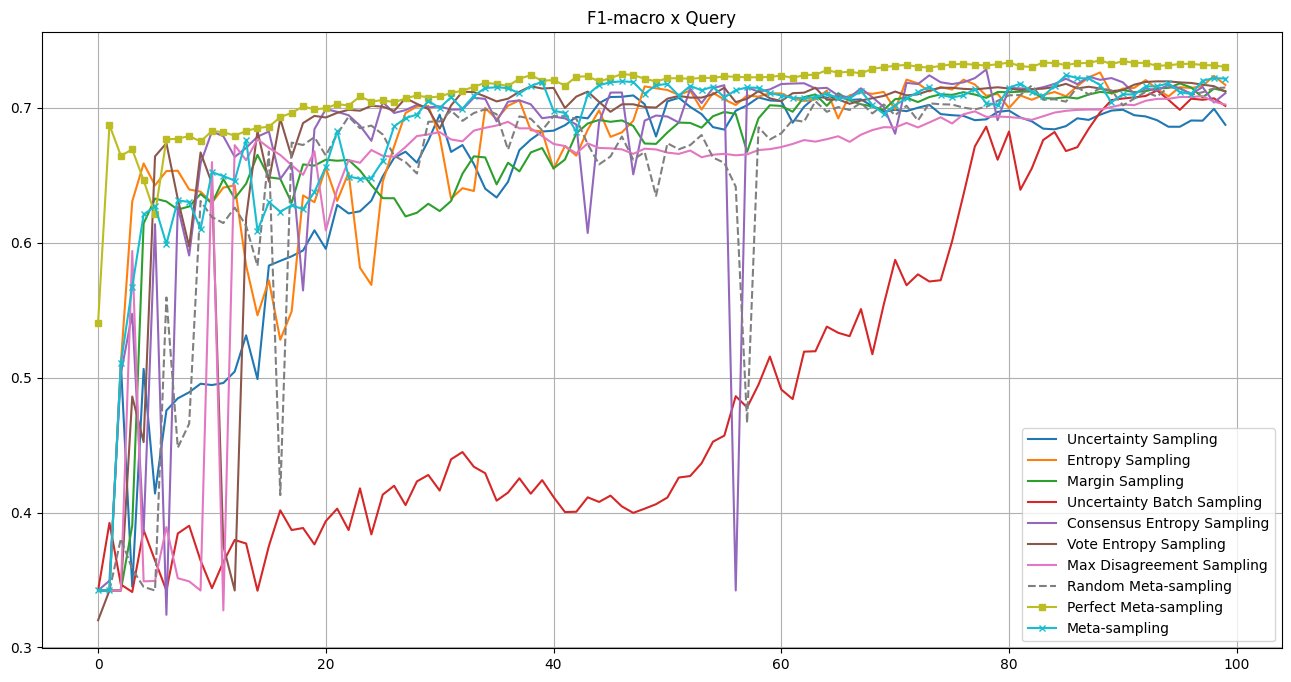

In [22]:
ax = pd.DataFrame(metrics_dict).plot(grid=True, markersize=5,style=styles,  figsize=(16,8), title='F1-macro x Query')

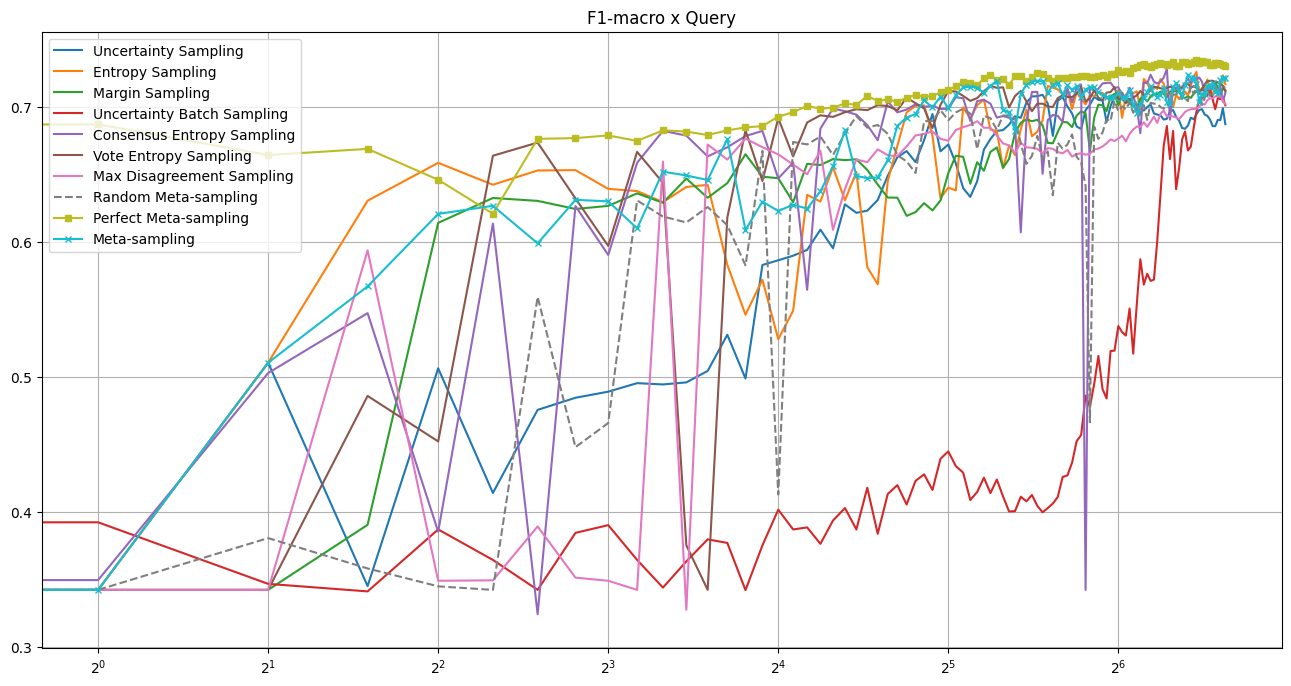

In [23]:
ax = pd.DataFrame(metrics_dict).plot(grid=True, style=styles, markersize=5, figsize=(16,8), title='F1-macro x Query')
ax.set_xscale('log', base=2)

In [24]:
gain_df = pd.DataFrame(metrics_dict).iloc[:, -3:]
baseline_column = gain_df['Random Meta-sampling']

gain_df = gain_df.apply(lambda x: x - baseline_column, axis=0)
gain_df

,Random Meta-sampling,Perfect Meta-sampling,Meta-sampling
0,0.0,0.198048,0.000000
1,0.0,0.344928,0.000000
2,0.0,0.283849,0.129978
3,0.0,0.310906,0.209035
4,0.0,0.301283,0.275985
...,...,...,...
95,0.0,0.018111,-0.002825
96,0.0,0.022837,0.000499
97,0.0,0.020165,0.008571
98,0.0,0.016985,0.007447


<Axes: title={'center': 'Ganho F1-macro x Query'}>

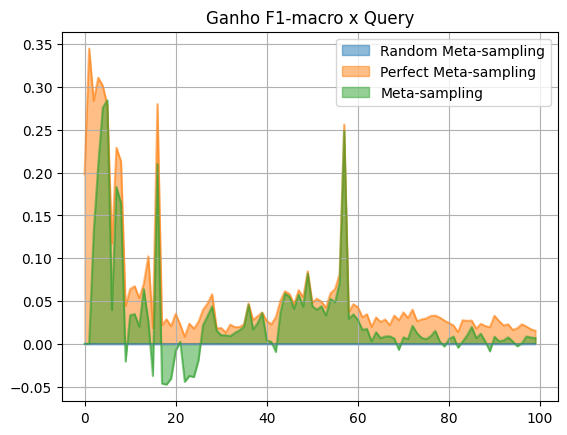

In [25]:
gain_df.plot.area(stacked=False, grid=True , title="Ganho F1-macro x Query")